In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
markets=pd.read_csv(r'E:\PYTHON\Data\markets_cleaned.csv')

In [3]:
markets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8739 entries, 0 to 8738
Data columns (total 37 columns):
FMID             8739 non-null int64
name             8739 non-null object
city             8699 non-null object
county           8228 non-null object
state            8739 non-null object
lat              8710 non-null float64
lon              8710 non-null float64
months_open      5452 non-null float64
Bakedgoods       8739 non-null int64
Beans            8739 non-null int64
Cheese           8739 non-null int64
Coffee           8739 non-null int64
Crafts           8739 non-null int64
Eggs             8739 non-null int64
Flowers          8739 non-null int64
Fruits           8739 non-null int64
Grains           8739 non-null int64
Herbs            8739 non-null int64
Honey            8739 non-null int64
Jams             8739 non-null int64
Juices           8739 non-null int64
Maple            8739 non-null int64
Meat             8739 non-null int64
Mushrooms        8739 non-null i

In [4]:
census=pd.read_csv(r'E:\PYTHON\Data\census-state-populations.csv')

In [5]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
state           51 non-null object
pop_est_2014    51 non-null int64
dtypes: int64(1), object(1)
memory usage: 896.0+ bytes


In [6]:
pollution=pd.read_csv(r'E:\PYTHON\Data\pollution_wide.csv')

In [7]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8888 entries, 0 to 8887
Data columns (total 8 columns):
city     8888 non-null object
year     8888 non-null int64
month    8888 non-null int64
day      8888 non-null int64
CO       8888 non-null float64
NO2      8888 non-null float64
O3       8888 non-null float64
SO2      8888 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 555.6+ KB


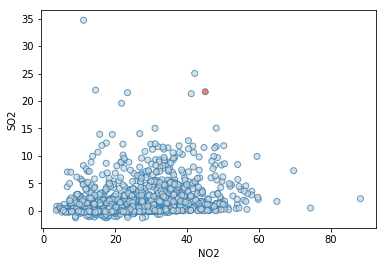

In [8]:
houston_pollution = pollution[pollution.city  ==  'Houston']

# Make array orangred for day 330 of year 2014, otherwise lightgray
houston_colors = ['orangered' if (day  ==  330) & (year  ==  2014) else 'lightgray' 
                  for day,year in zip(houston_pollution.day, houston_pollution.year)]

sns.regplot(x = 'NO2',
            y = 'SO2',
            data = houston_pollution,
            fit_reg = False, 
            # Send scatterplot argument to color points 
            scatter_kws = {'facecolors': houston_colors, 'alpha': 0.7})
plt.show()

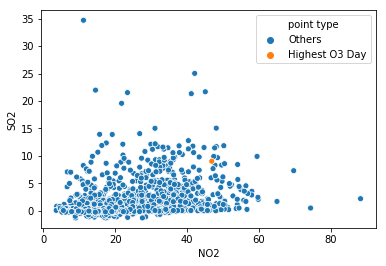

In [9]:

houston_pollution = pollution[pollution.city  ==  'Houston'].copy()

# Find the highest observed O3 value
max_O3 = houston_pollution.O3.max()

# Make a column that denotes which day had highest O3
houston_pollution['point type'] = ['Highest O3 Day' if O3  ==  max_O3 else 'Others' for O3 in houston_pollution.O3]

# Encode the hue of the points with the O3 generated column
sns.scatterplot(x = 'NO2',
                y = 'SO2',
                hue = 'point type',
                data = houston_pollution)
plt.show()

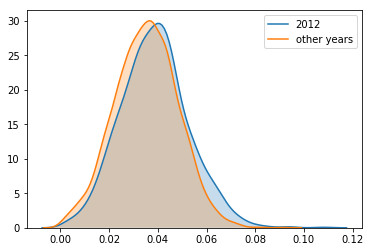

In [10]:
# Filter dataset to the year 2012
sns.kdeplot(pollution[pollution.year == 2012].O3, 
            # Shade under kde and add a helpful label
            shade = True,
            label = '2012')

# Filter dataset to everything except the year 2012
sns.kdeplot(pollution[pollution.year != 2012].O3, 
            # Again, shade under kde and add a helpful label
            shade = True,
            label = 'other years')
plt.show()

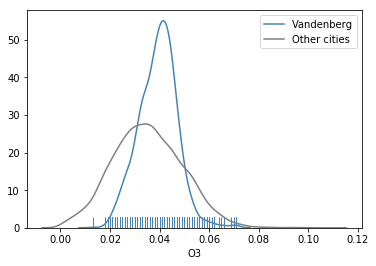

In [11]:
sns.distplot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3, 
             label = 'Vandenberg', 
             # Turn of the histogram and color blue to stand out
             hist = False,
             color = 'steelblue', 
             # Turn on rugplot
             rug = True)

sns.distplot(pollution[pollution.city != 'Vandenberg Air Force Base'].O3, 
             label = 'Other cities',
             # Turn off histogram and color gray
             hist = False,  
             color = 'gray')
plt.show()

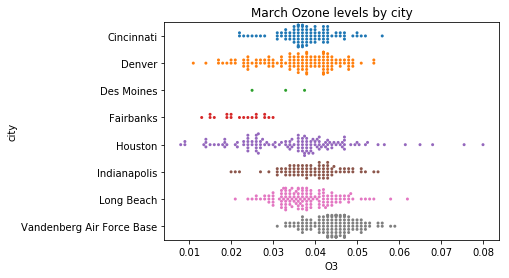

In [12]:
# Filter data to just March
pollution_mar = pollution[pollution.month == 3]

# Plot beeswarm with x as O3
sns.swarmplot(y = "city",
              x = 'O3', 
              data = pollution_mar, 
              # Decrease the size of the points to avoid crowding 
              size = 3)

# Give a descriptive title
plt.title('March Ozone levels by city')
plt.show()

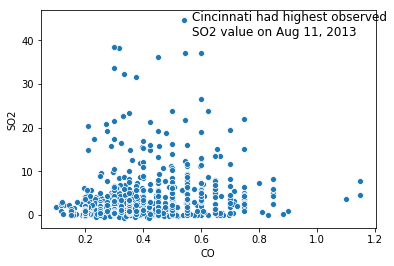

In [13]:
# Draw basic scatter plot of pollution data for August
sns.scatterplot(x = 'CO', y = 'SO2', data = pollution[pollution.month  ==  8])

# Label highest SO2 value with text annotation
plt.text(0.57, 41,
         'Cincinnati had highest observed\nSO2 value on Aug 11, 2013', 
         # Set the font to large
         fontdict = {'ha': 'left', 'size': 'large'})
plt.show()

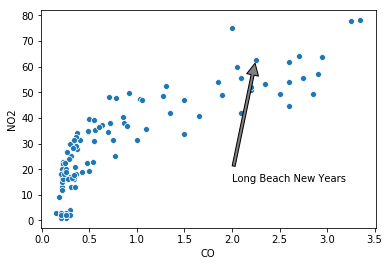

In [14]:
# Query and filter to New Years in Long Beach
jan_pollution = pollution.query("(month  ==  1) & (year  ==  2012)")
lb_newyears = jan_pollution.query("(day  ==  1) & (city  ==  'Long Beach')")

sns.scatterplot(x = 'CO', y = 'NO2',
                data = jan_pollution)

# Point arrow to lb_newyears & place text in lower left 
plt.annotate('Long Beach New Years',
             xy = (lb_newyears.CO, lb_newyears.NO2),
             xytext = (2, 15), 
             # Shrink the arrow to avoid occlusion
             arrowprops = {'facecolor':'gray', 'width': 3, 'shrink': 0.03},
             backgroundcolor = 'white')
plt.show()

In [15]:
# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]

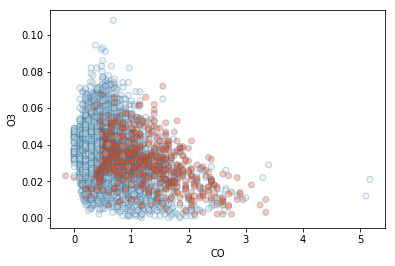

In [16]:
# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'CO',
            y = 'O3',
            data = pollution,
            fit_reg = False, 
            scatter_kws = {'facecolors':is_lb, 'alpha':0.3})
plt.show() 

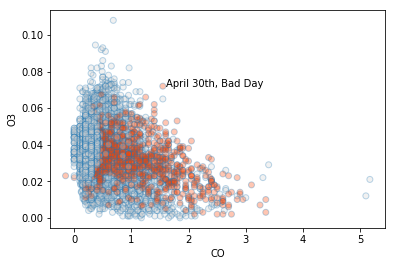

In [17]:
# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'CO',
            y = 'O3',
            data = pollution,
            fit_reg = False,
            scatter_kws = {'facecolors':is_lb, 'alpha': 0.3})

# Add annotation to plot
plt.text(1.6, 0.072, 'April 30th, Bad Day')
plt.show() 

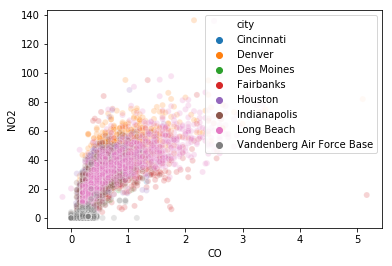

In [18]:
# Hard to read scatter of CO and NO2 w/ color mapped to city
sns.scatterplot('CO', 'NO2',
                alpha = 0.2,
                hue = 'city',
                data = pollution)
plt.show()

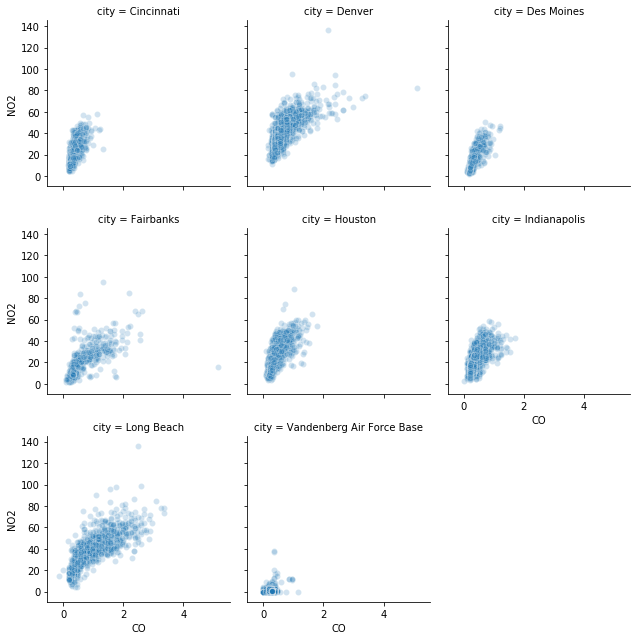

In [19]:
# Hard to read scatter of CO and NO2 w/ color mapped to city
# sns.scatterplot('CO', 'NO2',
#                 alpha = 0.2,
#                 hue = 'city',
#                 data = pollution)

# Setup a facet grid to separate the cities apart
g = sns.FacetGrid(data = pollution,
                  col = 'city',
                  col_wrap = 3)

# Map sns.scatterplot to create separate city scatter plots
g.map(sns.scatterplot, 'CO', 'NO2', alpha = 0.2)
plt.show()

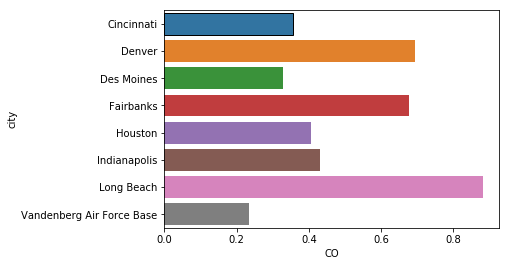

In [20]:
import numpy as np

sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
            ci = False,
              data = pollution,
              # Add a border to the bars
            edgecolor = 'black')
plt.show()

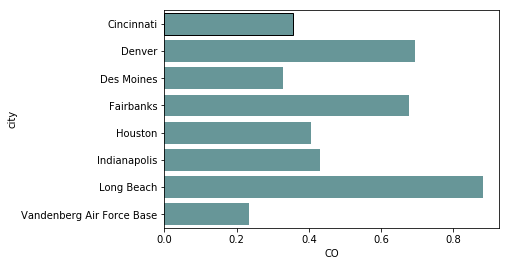

In [21]:
import numpy as np

sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
            ci = False,
              data = pollution,
              # Add a border to the bars
            edgecolor = 'black',
            color='cadetblue')
plt.show()

In [50]:
# # Dark plot background
# plt.style.use("dark_background")

# # Modify palette for dark background
# color_palette = sns.diverging_palette(250, 0,
#                                       center = 'dark',
#                                       as_cmap = True)

# # Pass palette to plot and set center
# sns.heatmap(oct_2015_o3,
#             cmap = color_palette,
#             center = 0)
# plt.yticks(rotation = 0)
# plt.show()

In [55]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


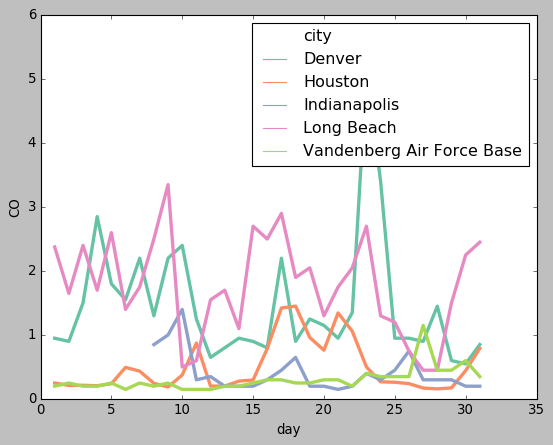

In [59]:
plt.style.use("classic")
# Filter our data to Jan 2013
pollution_jan13 = pollution[(pollution.year  ==  2013) & (pollution.month  ==  1)]

# Color lines by the city and use custom ColorBrewer palette
sns.lineplot(x = "day", 
             y = "CO", 
             hue = "city",
             palette = "Set2", 
             linewidth = 3,
             data = pollution_jan13)
plt.show()

In [61]:
# # Choose the combos that get distinct colors
# wanted_combos = ['Vandenberg Air Force Base NO2', 'Long Beach CO', 'Cincinnati SO2']

# # Assign a new column to DataFrame for isolating the desired combos
# city_pol_month['color_cats'] = [x if x in wanted_combos else 'other' for x in city_pol_month['city_pol']]

# # Plot lines with color driven by new column and lines driven by original categories
# sns.lineplot(x = "month",
#              y = "value",
#              hue = 'color_cats',
#              units = 'city_pol',
#              estimator = None,
#              palette = 'Set2',
#              data = city_pol_month)
# plt.show()

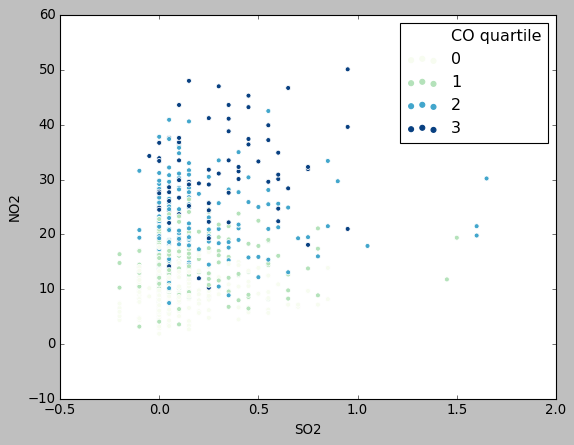

In [62]:
# Divide CO into quartiles
pollution['CO quartile'] = pd.qcut(pollution['CO'], q = 4, labels = False)

# Filter to just Des Moines
des_moines = pollution.query("city  ==  'Des Moines'")

# Color points with by quartile and use ColorBrewer palette
sns.scatterplot(x = 'SO2',
                y = 'NO2',
                hue = 'CO quartile', 
                  data = des_moines,
                palette = 'GnBu')
plt.show()

In [64]:
# # Reduce to just cities in the western half of US
# cities = ['Fairbanks', 'Long Beach', 'Vandenberg Air Force Base', 'Denver']


# # Filter data to desired cities
# city_maxes = max_pollutant_values[max_pollutant_values.city.isin(cities)]

# # Swap city and year encodings
# sns.catplot(x = 'city', hue = 'year',
#               y = 'value', row = 'pollutant',
#               # Change palette to one appropriate for ordinal categories
#               data = city_maxes, palette = 'BuGn',
#               sharey = False, kind = 'bar')
# plt.show()